1. [CHAID (Chi-squared Automatic Interaction Detector)](#chaid-chi-squared-automatic-interaction-detector)

#### CHAID (Chi-squared Automatic Interaction Detector):
- works with both regression and classification prediction but rarely used for regression
- works with numerical discrete and continuous variables and also with categorical variables
- multiple split and not binary split like CART
- ability handle non-monotonic relationship
- easy to interpret

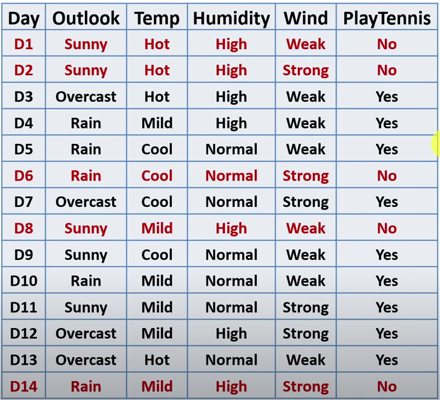

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset.png')
new_image = img.resize((440, 400))
display(new_image)

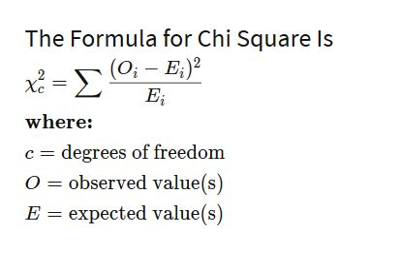

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/chisqr.jpg')
new_image = img.resize((400, 270))
display(new_image)

##### Process of CHAID:
- Need to find the feature with the highest importance
- Take feature Outlook:
    - Has 3 categories - Sunny, Overcast, Rain
        - Sunny:
            - Count of observed output class labels separately i.e. Yes (2) & No (3)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Sunny)/2 => 2.5
                - Expected Value(Sunny[Yes]) => ( rows*columns)/ total obs
                    - rows = (Sunny[Yes(O)]  +  Sunny[No(O)]) 
                    - columns =  (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)])
                    - total obs = (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)]  +  Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - Expected Value(Sunny[Yes]) = (2+3) * (2+4+3)/(2+4+3+3+0+2) => 45/14
                - Expected Value(Sunny[No]) => ( rows*columns)/ total obs
                    - rows = (Sunny[Yes(O)]  +  Sunny[No(O)]) 
                    - columns = (Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - total obs=  (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)]  +  Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - Expected Value(Sunny[No]) = (2+3) * (3+0+2)/(2+4+3+3+0+2) => 25/14
                - Now take the average of both the values = (Expected Value(Sunny[No]) + Expected Value(Sunny[Yes]))/2
                    - Expected Value(Sunny) = (45 + 25)/14*2 => 2.5
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((2-2.5)^2)/2.5)^(1/2) => 0.316
                - chi-squared value (No) = (((3-2.5)^2)/2.5)^(1/2) => 0.316
        - Overcast:
            - Count of observed output class labels separately i.e. Yes (4) & No (0)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Overcast)/2 => 2
                 - Expected Value(Overcast[Yes]) => ( rows*columns)/ total obs
                    - rows = (Overcast[Yes(O)]  +  Overcast[No(O)]) 
                    - columns =  (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)])
                    - total obs = (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)]  +  Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - Expected Value(Overcast[Yes]) = (4+0) * (2+4+3)/(2+4+3+3+0+2) => 18/7
                - Expected Value(Overcast[No]) => ( rows*columns)/ total obs
                    - rows = (Overcast[Yes(O)]  +  Overcast[No(O)]) 
                    - columns = (Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - total obs = (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)]  +  Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - Expected Value(Overcast[No]) = (4+0) * (3+0+2)/(2+4+3+3+0+2) => 10/7
                - Now take the average of both the values = (Expected Value(Overcast[No]) + Expected Value(Overcast[Yes]))/2
                    - Expected Value(Overcast) = (10 + 18)/7*2 => 3
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((4-2)^2)/2)^(1/2) => 1.414
                - chi-squared value (No) = (((0-2)^2)/2)^(1/2) => 1.414
        - Rain:
            - Count of observed output class labels separately i.e. Yes (3) & No (2)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Rain)/2 => 2.5
                - Expected Value(Rain[Yes]) => ( rows*columns)/ total obs
                    - rows = (Rain[Yes(O)]  +  Rain[No(O)])
                    - columns = (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)])
                    - total obs = (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)]  +  Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - Expected Value(Rain[Yes]) = (3+2) * (2+4+3)/(2+4+3+3+0+2) => 45/14
                - Expected Value(Rain[No]) => ( rows*columns)/ total obs
                    - rows = (Rain[Yes(O)]  +  Rain[No(O)]) 
                    - columns = (Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - total obs=  (Sunny[Yes(O)]  +  Overcast[Yes(O)]  +  Rain[Yes(O)]  +  Sunny[No(O)]  +  Overcast[No(O)]  +  Rain[No(O)])
                    - Expected Value(Rain[No]) = (3+2) * (3+0+2)/(2+4+3+3+0+2) => 25/14
                - Now take the average of both the values = (Expected Value(Rain[No]) + Expected Value(Rain[Yes]))/2
                    - Expected Value(Rain) = (45 + 25)/14*2 => 2.5
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((3-2.5)^2)/2.5)^(1/2) => 0.316
                - chi-squared value (No) = (((2-2.5)^2)/2.5)^(1/2) => 0.316
    - Now sum all the chi-squared value = 4.092

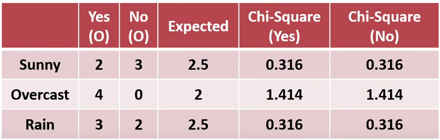

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/chisquare_value.png')
new_image = img.resize((440, 140))
display(new_image)

- Take feature Temperature:
    - Has 3 categories - Hot, Mild, Cold
        - Sunny:
            - Count of observed output class labels separately i.e. Yes (2) & No (2)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Hot)/2 => 2
                - Expected Value(Hot[Yes]) => ( rows*columns)/ total obs
                    - rows = (Hot[Yes(O)]  +  Hot[No(O)]) 
                    - columns =  (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)])
                    - total obs = (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)]  +  Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - Expected Value(Hot[Yes]) = (2+2) * (2+4+3)/(2+4+3+2+2+1) => 36/14
                - Expected Value(Hot[No]) => ( rows*columns)/ total obs
                    - rows = (Hot[Yes(O)]  +  Hot[No(O)]) 
                    - columns =  (Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - total obs = (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)]  +  Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - Expected Value(Hot[No]) = (2+2) * (2+2+1)/(2+4+3+2+2+1) => 20/14
                - Now take the average of both the values = (Expected Value(Hot[No]) + Expected Value(Hot[Yes]))/2
                    - Expected Value(Hot) = (36 + 20)/14*2 => 2
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((2-2)^2)/2)^(1/2) => 0
                - chi-squared value (No) = (((2-2)^2)/2)^(1/2) => 0
        - Mild:
            - Count of observed output class labels separately i.e. Yes (4) & No (2)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Mild)/2 => 3
                - Expected Value(Mild[Yes]) => ( rows*columns)/ total obs
                    - rows = (Mild[Yes(O)]  +  Mild[No(O)]) 
                    - columns =  (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)])
                    - total obs = (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)]  +  Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - Expected Value(Mild[Yes]) = (4+2) * (2+4+3)/(2+4+3+2+2+1) => 27/7
                - Expected Value(Mild[No]) => ( rows*columns)/ total obs
                    - rows = (Mild[Yes(O)]  +  Mild[No(O)]) 
                    - columns =  (Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - total obs = (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)]  +  Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - Expected Value(Mild[No]) = (4+2) * (3+0+2)/(2+4+3+2+2+1) => 15/7
                - Now take the average of both the values = (Expected Value(Mild[No]) + Expected Value(Mild[Yes]))/2
                    - Expected Value(Mild) = (27 + 15)/7*2 => 3
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((4-3)^2)/3)^(1/2) => 0.577
                - chi-squared value (No) = (((2-3)^2)/3)^(1/2) => 0.577
        - Cold:
            - Count of observed output class labels separately i.e. Yes (3) & No (1)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Cold)/2 => 2
                - Expected Value(Cold[Yes]) => ( rows*columns)/ total obs
                    - rows = (Cold[Yes(O)]  +  Cold[No(O)]) 
                    - columns =  (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)])
                    - total obs = (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)]  +  Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - Expected Value(Cold[Yes]) = (3+1) * (2+4+3)/(2+4+3+2+2+1) => 36/14
                - Expected Value(Cold[No]) => ( rows*columns)/ total obs
                    - rows = (Cold[Yes(O)]  +  Cold[No(O)]) 
                    - columns =  (Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - total obs = (Hot[Yes(O)]  +  Mild[Yes(O)]  +  Cold[Yes(O)]  +  Hot[No(O)]  +  Mild[No(O)]  +  Cold[No(O)])
                    - Expected Value(Cold[No]) = (3+1) * (3+0+2)/(2+4+3+2+2+1) => 20/14
                - Now take the average of both the values = (Expected Value(Cold[No]) + Expected Value(Cold[Yes]))/2
                    - Expected Value(Cold) = (36 + 20)/14*2 => 2
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((3-2)^2)/2)^(1/2) => 0.707
                - chi-squared value (No) = (((1-2)^2)/2)^(1/2) => 0.707
    - Now sum all the chi-squared value = 2.568

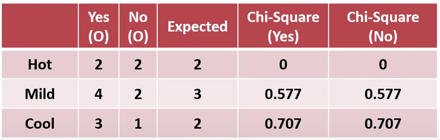

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/chisquare_value1.png')
new_image = img.resize((440, 140))
display(new_image)

- Take feature Humidity:
    - Has 2 categories - High, Normal
        - High:
            - Count of observed output class labels separately i.e. Yes (3) & No (4)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(High)/2 => 3.5
                - Expected Value(High[Yes]) => ( rows*columns)/ total obs
                    - rows = (High[Yes(O)]  +  High[No(O)]) 
                    - columns =  (High[Yes(O)]  +  Normal[Yes(O)])
                    - total obs = (High[Yes(O)]  +  Normal[Yes(O)]  +  High[No(O)]  +  Normal[No(O)])
                    - Expected Value(High[Yes]) = (3+4) * (3+6)/(3+4+6+1) => 9/2
                - Expected Value(High[No]) => ( rows*columns)/ total obs
                    - rows = (High[Yes(O)]  +  High[No(O)]) 
                    - columns = (High[No(O)]  +  Normal[No(O)])
                    - total obs=  (High[Yes(O)]  +  Normal[Yes(O)] +  High[No(O)]  +  Normal[No(O)])
                    - Expected Value(High[No]) = (3+4) * (4+1)/(3+4+6+1) => 5/2
                - Now take the average of both the values = (Expected Value(High[No]) + Expected Value(High[Yes]))/2
                    - Expected Value(High) = (9 + 5)/2*2 => 3.5
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((2-3.5)^2)/3.5)^(1/2) => 0.267
                - chi-squared value (No) = (((4-3.5)^2)/3.5)^(1/2) => 0.267
        - Normal:
            - Count of observed output class labels separately i.e. Yes (6) & No (1)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Normal)/2 => 3.5
                    - Expected Value(Normal[Yes]) => ( rows*columns)/ total obs
                    - rows = (Normal[Yes(O)]  +  Normal[No(O)]) 
                    - columns =  (High[Yes(O)]  +  Normal[Yes(O)])
                    - total obs = (High[Yes(O)]  +  Normal[Yes(O)]  +  High[No(O)]  +  Normal[No(O)])
                    - Expected Value(Normal[Yes]) = (6+1) * (3+6)/(3+4+6+1) => 9/2
                - Expected Value(Normal[No]) => ( rows*columns)/ total obs
                    - rows = (Normal[Yes(O)]  +  Normal[No(O)]) 
                    - columns = (High[No(O)]  +  Normal[No(O)])
                    - total obs=  (High[Yes(O)]  +  Normal[Yes(O)] +  High[No(O)]  +  Normal[No(O)])
                    - Expected Value(Normal[No]) = (6+1) * (4+1)/(3+4+6+1) => 5/2
                - Now take the average of both the values = (Expected Value(Normal[No]) + Expected Value(Normal[Yes]))/2
                    - Expected Value(Normal) = (9 + 5)/2*2 => 3.5
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((4-2)^2)/2)^(1/2) => 1.336
                - chi-squared value (No) = (((0-2)^2)/2)^(1/2) => 1.336
    - Now sum all the chi-squared value = 3.206

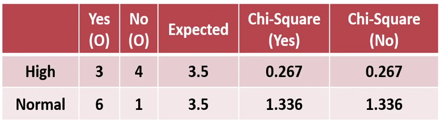

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/chisquare_value2.png')
new_image = img.resize((440, 120))
display(new_image)

- Take feature Humidity:
    - Has 2 categories - Weak, Strong
        - High:
            - Count of observed output class labels separately i.e. Yes (5) & No (2)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Weak)/2 => 3.5
                - Expected Value(Weak[Yes]) => ( rows*columns)/ total obs
                    - rows = (Weak[Yes(O)]  +  Weak[No(O)]) 
                    - columns =  (Weak[Yes(O)]  +  Strong[Yes(O)])
                    - total obs = (Weak[Yes(O)]  +  Strong[Yes(O)]  +  Weak[No(O)]  +  Strong[No(O)])
                    - Expected Value(Weak[Yes]) = (5+2) * (5+3)/(5+2+3+3) => 56/13
                - Expected Value(Weak[No]) => ( rows*columns)/ total obs
                    - rows = (Weak[Yes(O)]  +  Weak[No(O)]) 
                    - columns = (Weak[No(O)]  +  Strong[No(O)])
                    - total obs=  (Weak[Yes(O)]  +  Strong[Yes(O)] +  Weak[No(O)]  +  Strong[No(O)])
                    - Expected Value(Weak[No]) = (5+2) * (2+3)/(5+2+3+3) => 35/13
                - Now take the average of both the values = (Expected Value(Weak[No]) + Expected Value(Weak[Yes]))/2
                    - Expected Value(Weak) = (56 + 35)/13*2 => 3.5
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((5-3.5)^2)/3.5)^(1/2) => 0.801
                - chi-squared value (No) = (((2-3.5)^2)/3.5)^(1/2) => 0.801
        - Strong:
            - Count of observed output class labels separately i.e. Yes (3) & No (3)
            - Calculate the Expected value by taking the average of observed output class labels = E = Expected Value(Strong)/2 => 3
                    - Expected Value(Strong[Yes]) => ( rows*columns)/ total obs
                    - rows = (Strong[Yes(O)]  +  Strong[No(O)]) 
                    - columns =  (Weak[Yes(O)]  +  Strong[Yes(O)])
                    - total obs = (Weak[Yes(O)]  +  Strong[Yes(O)]  +  Weak[No(O)]  +  Strong[No(O)])
                    - Expected Value(Strong[Yes]) = (3+3) * (5+3)/(5+2+3+3) => 48/13
                - Expected Value(Strong[No]) => ( rows*columns)/ total obs
                    - rows = (Strong[Yes(O)]  +  Strong[No(O)]) 
                    - columns = (Weak[No(O)]  +  Strong[No(O)])
                    - total obs=  (Weak[Yes(O)]  +  Strong[Yes(O)] +  Weak[No(O)]  +  Strong[No(O)])
                    - Expected Value(Strong[No]) = (3+3) * (2+3)/(5+2+3+3) => 30/13
                - Now take the average of both the values = (Expected Value(Strong[No]) + Expected Value(Strong[Yes]))/2
                    - Expected Value(Strong) = (48 + 30)/13*2 => 3
            - Calculate the Chi-squared value for each category of the feature class with relevance to the output labels
                - chi-squared value (Yes) = (((3-3)^2)/3)^(1/2) => 0
                - chi-squared value (No) = (((3-3)^2)/3)^(1/2) => 0
    - Now sum all the chi-squared value = 1.602

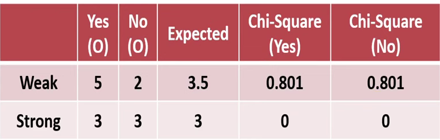

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/chisquare_value3.png')
new_image = img.resize((440, 140))
display(new_image)

- now we compare all the chi-squared values of all the features and choose the feature with the highest chi-squared value as the root node i.e Outlook

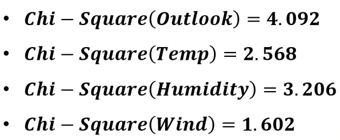

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/chisquare_value_compare.png')
new_image = img.resize((340, 140))
display(new_image)

- now, we construct the tree using Outlook feature as the root node

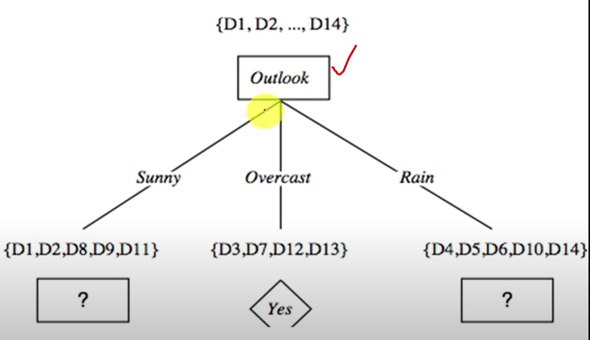

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/tree1.png')
new_image = img.resize((590, 340))
display(new_image)

- We repeat the same process of calculating the chi-squared values for the remaining features which are to be created i.e. Sunny & Rain branch since they are the impure nodes
- Now calculating the sum of chi-squared value for features Wind, Temperature & Humidity and picking the feature with high importance for branching nodes
- The dataset chosen is confined to sunny label in outlook feature

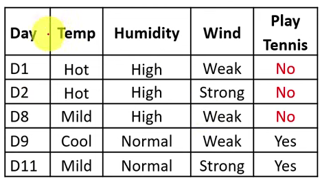

In [19]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset_sunny.png')
new_image = img.resize((320, 180))
display(new_image)

- Temperature:

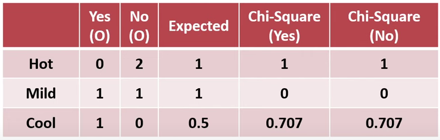

In [20]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/sunny_table.png')
new_image = img.resize((440, 140))
display(new_image)

- Humidity:

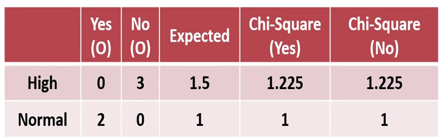

In [21]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/sunny_table2.png')
new_image = img.resize((440, 140))
display(new_image)

- Wind:

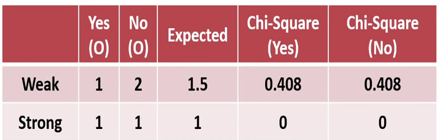

In [22]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/sunny_table3.png')
new_image = img.resize((440, 140))
display(new_image)

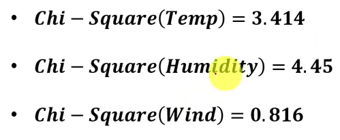

In [23]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/chisquare_value_compare1.png')
new_image = img.resize((340, 140))
display(new_image)

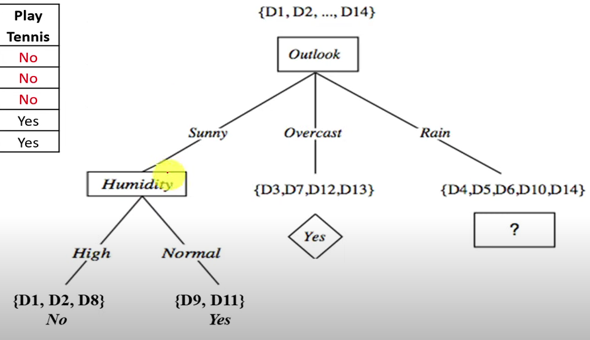

In [24]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/tree2.png')
new_image = img.resize((590, 340))
display(new_image)

- Now calculating the sum of chi-squared value for features Wind, Temperature and picking the feature with high importance for branching nodes
- The dataset chosen is confined to Rain label in outlook feature

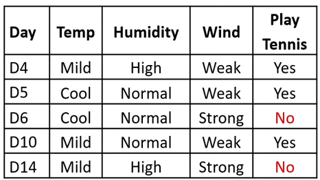

In [26]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/dataset_rain.png')
new_image = img.resize((320, 180))
display(new_image)

- Temperature:

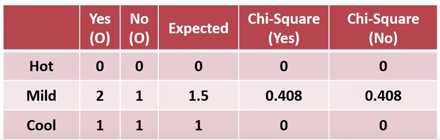

In [25]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rain_table.png')
new_image = img.resize((440, 140))
display(new_image)

- Humidity:

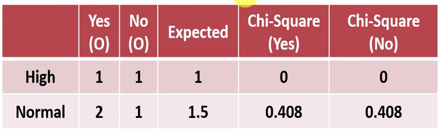

In [31]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rain_table2.png')
new_image = img.resize((440, 130))
display(new_image)

- Wind:

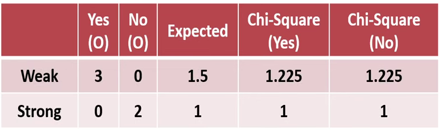

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/rain_table3.png')
new_image = img.resize((440, 130))
display(new_image)

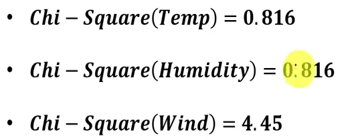

In [33]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/chisquare_value_compare2.png')
new_image = img.resize((340, 140))
display(new_image)

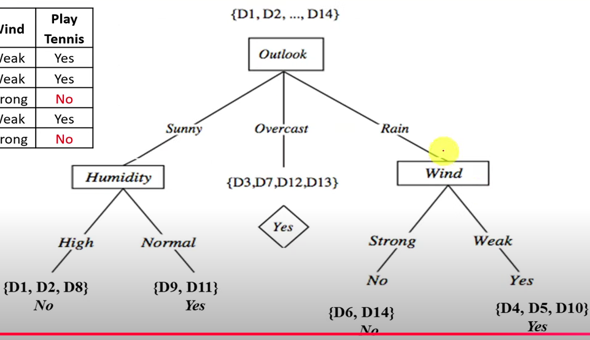

In [34]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/tree3.png')
new_image = img.resize((590, 340))
display(new_image)

- Since the tree already has reached the leaf nodes, we omit the remaining features. If the tree has not reached the leaf nodes in all branches then, we continue branching with the remaining features 

Handling Numerical Input Features:
- At first, a process called Binning is implemented by the 3 options available
    - Equal width intervals
    - Equal frequency intervals
    - User-defined intervals
- Now, the created bins are check for statistical significance 
    - if there is no statistical significance between the adjacent bins then the two adjacent bins are merged else not